In [35]:
%reset -f
import os, pickle
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['mathtext.fontset'] = 'cm'

In [36]:
#########################################################################################
# Function to extract and put results together
#########################################################################################
# res_type -> type of result, 0 extracts the main results between feature selection methods,
                # 1 extracts and plots for >65 and 2 <65
def extract_main_results(pickles, title, res_type=0):
    colors = ['darkorange', 'navy','g','r','c', 'm', 'b', 'k']
    df_main_result = pd.DataFrame()
    
    if res_type == 1:
        title2 = title + "_OVER_65"
        title = title + " for patients >65 years"
    elif res_type == 2:
        title2 = title + "_UNDER_65"
        title = title + " for patients <65 years"
    else:
        title2 = title

    for idx_pick, pick_file in enumerate(pickles):

        clf_name3 = pick_file.split('_')[-2]

        lw = 1.5
        pickle_path = new_path + r'/' + pick_file
        df_results, dict_auroc = pickle.load(open(pickle_path,'rb'))
        # ---------------------------------------------------------------
        if res_type == 1:   
            df_results = df_results[[('>65' in s) for s in df_results.index]]
        elif res_type == 2: 
            df_results = df_results[[('<65' in s) for s in df_results.index]]
        else:
            df_results = df_results[[not(('>65' in s) or ('<65' in s)) for s in df_results.index]]
        clf_main_result = df_results[df_results['AUC'] == df_results['AUC'].max()].iloc[0]
        # ---------------------------------------------------------------
        df_main_result[clf_name3]  = clf_main_result
        fe_name   = clf_main_result.name.split('_')[-2]
        auc = clf_main_result['AUC']
        rcl = clf_main_result['Recall']
        fpr, tpr = dict_auroc[clf_main_result.name]
        label = "clf " + clf_name3 +", FE "+fe_name + ": AUC = {:,.2f} recall = {:,.2f}".format(auc, rcl)
        plt.plot(fpr,  tpr,  color= colors[idx_pick],  lw=lw,label= label)
    plt.plot([0, 1], [0, 1], color="k", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUROC Curve "+ title.replace('_',' '))
    plt.legend(bbox_to_anchor=(0.4, 0.55))

    plt.savefig(r'AUROC_'+title2+'.png', transparent = True, bbox_inches = "tight")
    plt.show()
    df_main_result = df_main_result.T
    return df_main_result

In [ ]:
###############################################
# GLOBAL PARAMETERS
###############################################
new_path = r'/home/d/dlr10/Documents/02_Statitics_modelling/3_Modelling_V4/Sub_results'

results_names = ['1st_Bal', '1st_Ubl', 'PnT_Bal', 'PnT_Ubl']
dict_titles = {'1st_Bal':"First Samp Data Balanced",  '1st_Ubl': "First Samp Data Unbalanced", 
               'PnT_Bal':"PnTs Data Balanced", 'PnT_Ubl': "PnTs Data Unbalanced"}

                    GENERAL RESULTS FEATURE SELECTION               
----------------------- First Samp Data Balanced -----------------------


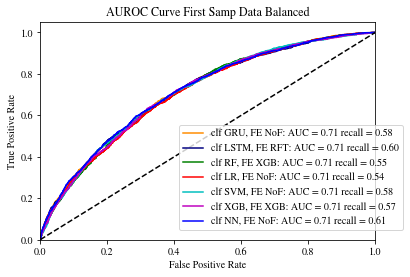

,Precision,Recall,F1_Score,Accuracy,AUC,brier,AUC_IC
GRU,0.398317,0.584362,0.473728,0.680182,0.713858,0.19824,"[0.7, 0.726]"
LSTM,0.389904,0.603909,0.473865,0.669665,0.711597,0.199075,"[0.7, 0.723]"
RF,0.39881,0.55144,0.462867,0.684744,0.70984,0.198228,"[0.7, 0.722]"
LR,0.398636,0.541152,0.459088,0.685884,0.706612,0.197834,"[0.7, 0.718]"
SVM,0.402003,0.578189,0.474262,0.684237,0.711644,0.19748,"[0.7, 0.723]"
XGB,0.397642,0.572531,0.469323,0.681069,0.710049,0.202721,"[0.7, 0.722]"
NN,0.398646,0.605967,0.480914,0.677775,0.714218,0.200677,"[0.7, 0.726]"



----------------------- First Samp Data Unbalanced -----------------------


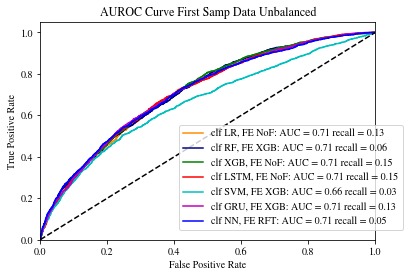

,Precision,Recall,F1_Score,Accuracy,AUC,brier,AUC_IC
LR,0.627792,0.130144,0.215594,0.766726,0.711076,0.169545,"[0.7, 0.722]"
RF,0.662651,0.056584,0.104265,0.760517,0.711917,0.168786,"[0.7, 0.724]"
XGB,0.579365,0.150206,0.238562,0.763811,0.714009,0.171967,"[0.7, 0.726]"
LSTM,0.586066,0.147119,0.235197,0.764318,0.71054,0.171649,"[0.7, 0.723]"
SVM,0.708861,0.028807,0.055363,0.757856,0.662733,0.174803,"[0.65, 0.675]"
GRU,0.601852,0.133745,0.218855,0.764825,0.711825,0.170068,"[0.7, 0.723]"
NN,0.757576,0.05144,0.096339,0.762291,0.711683,0.16907,"[0.7, 0.723]"



----------------------- PnTs Data Balanced -----------------------


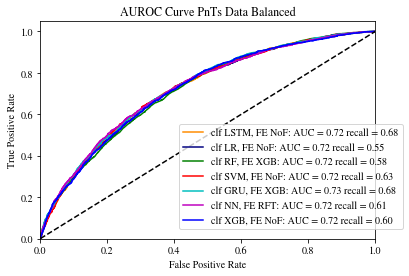

,Precision,Recall,F1_Score,Accuracy,AUC,brier,AUC_IC
LSTM,0.388235,0.679012,0.494012,0.657375,0.722795,0.2064,"[0.71, 0.734]"
LR,0.415953,0.549897,0.473638,0.698936,0.720195,0.192972,"[0.71, 0.731]"
RF,0.401786,0.578704,0.474283,0.683984,0.716192,0.199058,"[0.71, 0.728]"
SVM,0.406343,0.632716,0.49487,0.68183,0.72235,0.200266,"[0.71, 0.734]"
GRU,0.389053,0.67644,0.493989,0.658642,0.725932,0.204956,"[0.72, 0.737]"
NN,0.410371,0.614712,0.492175,0.687532,0.724151,0.198129,"[0.71, 0.735]"
XGB,0.402426,0.597222,0.480845,0.682337,0.719868,0.201387,"[0.71, 0.731]"



----------------------- PnTs Data Unbalanced -----------------------


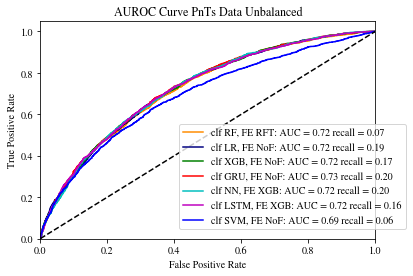

,Precision,Recall,F1_Score,Accuracy,AUC,brier,AUC_IC
RF,0.688776,0.069444,0.126168,0.763051,0.721534,0.167089,"[0.71, 0.733]"
LR,0.561086,0.191358,0.285386,0.763938,0.723593,0.166102,"[0.71, 0.735]"
XGB,0.546493,0.172325,0.262026,0.760897,0.724833,0.168297,"[0.71, 0.736]"
GRU,0.560294,0.195988,0.290396,0.764065,0.726348,0.167755,"[0.72, 0.738]"
NN,0.519947,0.201132,0.290059,0.757476,0.724219,0.168013,"[0.71, 0.736]"
LSTM,0.577132,0.16358,0.25491,0.764445,0.724501,0.165699,"[0.71, 0.735]"
SVM,0.69697,0.059156,0.109056,0.761911,0.690607,0.170366,"[0.68, 0.702]"


In [37]:
print("====================================================================")
print("                    GENERAL RESULTS FEATURE SELECTION               ")
print("====================================================================")


for prfx in results_names:
    pickles   = [x for x in os.listdir(new_path) if ('.pickle' in x) and (prfx in x)]
    title = dict_titles[prfx]
    res_type = 0
    print("-----------------------", title, "-----------------------")
    display(extract_main_results(pickles, title, res_type = 0))
    print("")

                      RESULTS FOR PATIENTS OVER 65                  
----------------------- First Samp Data Balanced -----------------------


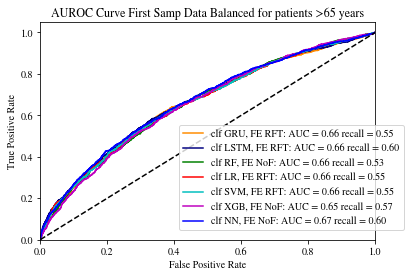

,Precision,Recall,F1_Score,Accuracy,AUC,brier,AUC_IC
GRU,0.436926,0.551893,0.487726,0.645643,0.659729,0.220961,"[0.65, 0.674]"
LSTM,0.425302,0.601343,0.49823,0.629782,0.662083,0.224392,"[0.65, 0.676]"
RF,0.428361,0.532967,0.474973,0.639858,0.656817,0.221761,"[0.64, 0.671]"
LR,0.434993,0.549451,0.485568,0.64415,0.657337,0.222725,"[0.64, 0.672]"
SVM,0.429942,0.547009,0.481462,0.639858,0.65785,0.223084,"[0.64, 0.672]"
XGB,0.419095,0.570818,0.483329,0.626983,0.654267,0.230113,"[0.64, 0.669]"
NN,0.420222,0.601343,0.494726,0.624557,0.665231,0.226682,"[0.65, 0.679]"



----------------------- First Samp Data Unbalanced -----------------------


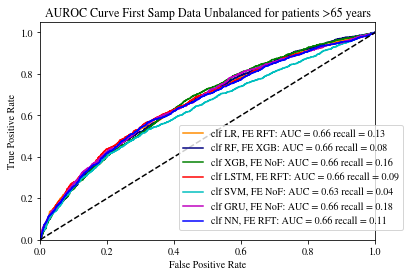

,Precision,Recall,F1_Score,Accuracy,AUC,brier,AUC_IC
LR,0.682243,0.1337,0.223583,0.716178,0.660501,0.200856,"[0.65, 0.675]"
RF,0.652381,0.083639,0.148268,0.706288,0.659708,0.201483,"[0.65, 0.674]"
XGB,0.571429,0.161172,0.251429,0.706662,0.662015,0.20596,"[0.65, 0.676]"
LSTM,0.68599,0.086691,0.15393,0.708714,0.662634,0.200099,"[0.65, 0.677]"
SVM,0.693878,0.041514,0.078341,0.701437,0.631113,0.206086,"[0.62, 0.646]"
GRU,0.586694,0.177656,0.272727,0.710394,0.662327,0.199564,"[0.65, 0.676]"
NN,0.655052,0.114774,0.195325,0.710954,0.656407,0.201846,"[0.64, 0.67]"



----------------------- PnTs Data Balanced -----------------------


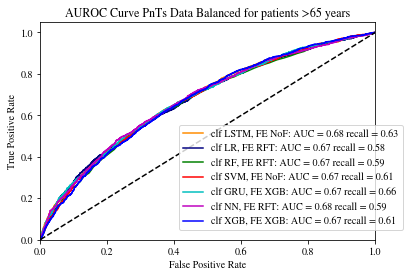

,Precision,Recall,F1_Score,Accuracy,AUC,brier,AUC_IC
LSTM,0.424255,0.63431,0.508441,0.625117,0.675187,0.222587,"[0.66, 0.689]"
LR,0.4287,0.583639,0.494312,0.635007,0.671592,0.224062,"[0.66, 0.685]"
RF,0.429518,0.593407,0.498334,0.63482,0.665957,0.225583,"[0.65, 0.68]"
SVM,0.428571,0.60989,0.503401,0.632208,0.671038,0.225535,"[0.66, 0.685]"
GRU,0.416537,0.655067,0.509255,0.614107,0.67485,0.226574,"[0.66, 0.689]"
NN,0.435586,0.590354,0.501296,0.640978,0.675043,0.222218,"[0.66, 0.689]"
XGB,0.424396,0.611722,0.501125,0.627729,0.67059,0.231898,"[0.66, 0.684]"



----------------------- PnTs Data Unbalanced -----------------------


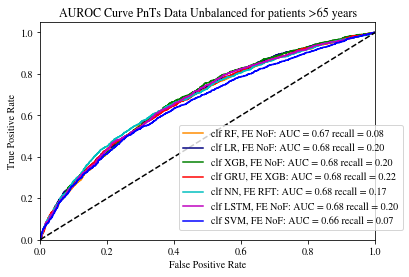

,Precision,Recall,F1_Score,Accuracy,AUC,brier,AUC_IC
RF,0.643564,0.079365,0.141304,0.705169,0.673317,0.198888,"[0.66, 0.687]"
LR,0.595238,0.198413,0.297619,0.713753,0.678775,0.197298,"[0.67, 0.692]"
XGB,0.579422,0.195971,0.292883,0.710767,0.682107,0.200259,"[0.67, 0.696]"
GRU,0.563981,0.217949,0.314399,0.709461,0.675029,0.20044,"[0.66, 0.689]"
NN,0.598698,0.168498,0.262982,0.711327,0.67917,0.197329,"[0.67, 0.693]"
LSTM,0.571675,0.202076,0.298602,0.709834,0.677569,0.196645,"[0.66, 0.691]"
SVM,0.653409,0.070208,0.126792,0.704422,0.658132,0.201606,"[0.65, 0.673]"


In [38]:
print("====================================================================")
print("                      RESULTS FOR PATIENTS OVER 65                  ")
print("====================================================================")
for prfx in results_names:
    pickles   = [x for x in os.listdir(new_path) if ('.pickle' in x) and (prfx in x)]
    title = dict_titles[prfx]
    res_type = 0
    print("-----------------------", title, "-----------------------")
    display(extract_main_results(pickles, title, res_type = 1))
    print("")

                     RESULTS FOR PATIENTS UNDER 65                  
----------------------- First Samp Data Balanced -----------------------


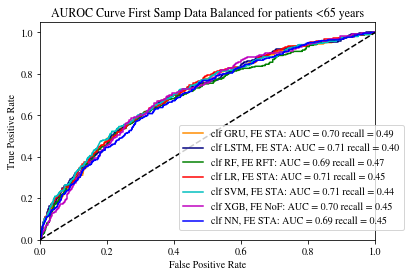

,Precision,Recall,F1_Score,Accuracy,AUC,brier,AUC_IC
GRU,0.251265,0.486928,0.331479,0.762732,0.703364,0.163195,"[0.67, 0.728]"
LSTM,0.264192,0.395425,0.316754,0.79392,0.705498,0.173765,"[0.68, 0.73]"
RF,0.239669,0.473856,0.318332,0.754836,0.691253,0.165973,"[0.66, 0.717]"
LR,0.258427,0.45098,0.328571,0.777339,0.708474,0.159248,"[0.68, 0.733]"
SVM,0.263158,0.441176,0.32967,0.783261,0.708126,0.162724,"[0.68, 0.733]"
XGB,0.239092,0.447712,0.311718,0.761153,0.700859,0.164049,"[0.67, 0.725]"
NN,0.229097,0.447712,0.303097,0.751283,0.691828,0.170246,"[0.66, 0.716]"



----------------------- First Samp Data Unbalanced -----------------------


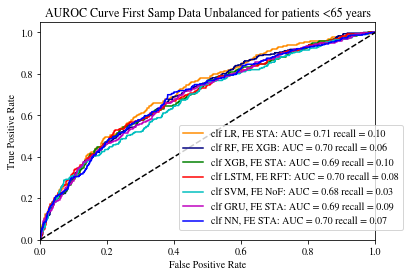

,Precision,Recall,F1_Score,Accuracy,AUC,brier,AUC_IC
LR,0.542373,0.104575,0.175342,0.881169,0.714759,0.100601,"[0.69, 0.739]"
RF,0.459459,0.055556,0.099125,0.87801,0.699655,0.100936,"[0.67, 0.724]"
XGB,0.491803,0.098039,0.163488,0.8788,0.692407,0.103094,"[0.66, 0.72]"
LSTM,0.393443,0.078431,0.13079,0.874062,0.695512,0.101653,"[0.67, 0.721]"
SVM,0.454545,0.03268,0.060976,0.878405,0.678094,0.100951,"[0.65, 0.704]"
GRU,0.54,0.088235,0.151685,0.880774,0.690395,0.103559,"[0.66, 0.717]"
NN,0.55,0.071895,0.127168,0.880774,0.695748,0.10227,"[0.67, 0.721]"



----------------------- PnTs Data Balanced -----------------------


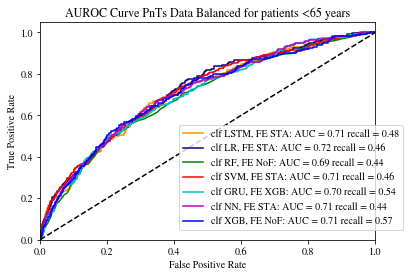

,Precision,Recall,F1_Score,Accuracy,AUC,brier,AUC_IC
LSTM,0.243333,0.477124,0.322296,0.7576,0.709065,0.170976,"[0.68, 0.733]"
LR,0.247803,0.460784,0.322286,0.76589,0.717154,0.163998,"[0.69, 0.74]"
RF,0.253283,0.441176,0.321812,0.775365,0.692,0.164108,"[0.66, 0.717]"
SVM,0.256318,0.464052,0.330233,0.772602,0.713771,0.165687,"[0.69, 0.737]"
GRU,0.22435,0.535948,0.316297,0.720095,0.701334,0.197533,"[0.67, 0.724]"
NN,0.256121,0.444444,0.32497,0.776944,0.709935,0.152916,"[0.68, 0.733]"
XGB,0.228346,0.568627,0.325843,0.715752,0.705794,0.196244,"[0.68, 0.73]"



----------------------- PnTs Data Unbalanced -----------------------


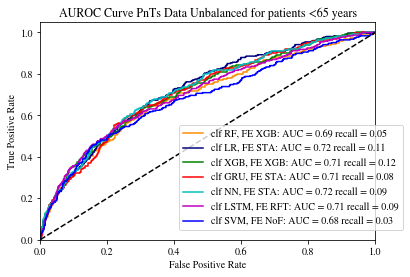

,Precision,Recall,F1_Score,Accuracy,AUC,brier,AUC_IC
RF,0.454545,0.04902,0.088496,0.87801,0.693301,0.099993,"[0.66, 0.719]"
LR,0.514706,0.114379,0.187166,0.879984,0.724286,0.099762,"[0.7, 0.748]"
XGB,0.529412,0.117647,0.192513,0.880774,0.714256,0.099171,"[0.69, 0.738]"
GRU,0.568182,0.081699,0.142857,0.881563,0.713167,0.101312,"[0.69, 0.737]"
NN,0.595745,0.091503,0.15864,0.882748,0.720391,0.100283,"[0.69, 0.744]"
LSTM,0.490909,0.088235,0.149584,0.8788,0.706224,0.100349,"[0.68, 0.733]"
SVM,0.555556,0.03268,0.061728,0.879984,0.682847,0.100086,"[0.65, 0.71]"


In [39]:
print("====================================================================")
print("                     RESULTS FOR PATIENTS UNDER 65                  ")
print("====================================================================")
for prfx in results_names:
    pickles   = [x for x in os.listdir(new_path) if ('.pickle' in x) and (prfx in x)]
    title = dict_titles[prfx]
    res_type = 0
    print("-----------------------", title, "-----------------------")
    display(extract_main_results(pickles, title, res_type = 2))
    print("")